# Existence d'un "goulet"

Toutes les commandes doivent passer par une même station

In [11]:
# Time limit
T = 20

# Stations number
D = 10

# Requests number
R = 10

In [35]:
from random import seed
from random import randint

# seed random number generator
seed(4)

requests_list = []

for i in range(R):
    t1 = randint(0,T-1)
    t2 = randint(t1+1,T)
    # on tourne autour de la gare (5)
    d1 = randint(0,5)
    d2 = randint(5,D)
    r = (d1,d2,t1,t2)
    requests_list.append(r)
print(requests_list)

[(0, 10, 7, 12), (1, 5, 12, 20), (3, 9, 2, 3), (1, 9, 9, 10), (2, 6, 17, 19), (1, 5, 3, 12), (1, 6, 8, 13), (5, 10, 9, 14), (4, 7, 11, 13), (1, 6, 12, 16)]


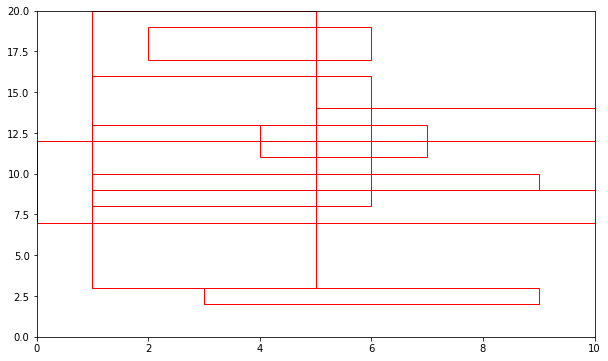

In [36]:
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Create the window itself

fig, ax = plt.subplots(figsize=(10, 6))

xlim(0,10)
ylim(0,20)

# Create the rectangles "patchs"
for i in range(R):
    a = requests_list[i]
    rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle to the Axes
    ax.add_patch(rect)

plt.show()

# Clique creation and resolution

In [37]:
# Les nodes sont dans V
V = requests_list
E = []

for i in range(R):
    for j in range(R-1-i):
        V1 = V[i]
        V2 = V[R-j-1]
        print(i,R-j-1)  # On les a bien tous
        print(V1,V2)
        
        # On regarde qui est le plus à gauche, on renomme si besoin
        if V1[0] > V2[0]:
            a = V2
            V2 = V1
            V1 = a
            print(V1,V2)
        if V1[2] < V2[3]:                    # 1) Si celui à droite est trop bas, NOT COMPATIBLE
            if V1[3] < V2[2]:                # 2) Si il est complètement plus haut, il faut checker si il est aussi assez à droite
                if V1[1] <= V2[0]:
                # Add V1V2 au graphe         # Donc, s'il est complètement au dessus il nous faut aussi V1[1] < V2[0]
                    E.append((i,R-j-1))
            elif V1[3] >= V2[2]:             # Si celui à droite n'est pas trop haut, on est bon de toute manière
                # Add V1V2 au graphe
                E.append((i,R-j-1))
        print(E)

0 9
(0, 10, 7, 12) (1, 6, 12, 16)
[(0, 9)]
0 8
(0, 10, 7, 12) (4, 7, 11, 13)
[(0, 9), (0, 8)]
0 7
(0, 10, 7, 12) (5, 10, 9, 14)
[(0, 9), (0, 8), (0, 7)]
0 6
(0, 10, 7, 12) (1, 6, 8, 13)
[(0, 9), (0, 8), (0, 7), (0, 6)]
0 5
(0, 10, 7, 12) (1, 5, 3, 12)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5)]
0 4
(0, 10, 7, 12) (2, 6, 17, 19)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5)]
0 3
(0, 10, 7, 12) (1, 9, 9, 10)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3)]
0 2
(0, 10, 7, 12) (3, 9, 2, 3)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3)]
0 1
(0, 10, 7, 12) (1, 5, 12, 20)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 1)]
1 9
(1, 5, 12, 20) (1, 6, 12, 16)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 1), (1, 9)]
1 8
(1, 5, 12, 20) (4, 7, 11, 13)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 1), (1, 9), (1, 8)]
1 7
(1, 5, 12, 20) (5, 10, 9, 14)
[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 1), (1, 9), (1, 8), (1, 7)]
1 6
(1, 5, 12, 20) (1, 6, 8, 13)
[(0, 9), (0, 8), (0, 7),

In [38]:
from gurobipy import *
import gurobipy as gp

try:
    # Create the model
    m = gp.Model("task_1")
    
    # Create variables
    liste = range(R)
    x = m.addVars(liste, vtype=GRB.BINARY, name = "x")
    
    # Set objective
    m.setObjective(quicksum(x), GRB.MAXIMIZE)
    
    # Set constraints
    print(E)
    for i in range(R):
        E_i = []
        for j in range(R):
            if i != j and (i,j) not in E and (j,i) not in E:
                E_i.append(j)
        print(i,E_i)
        m.addConstrs((x[i] + x[k] <= 1 for k in E_i), name='')
    m.optimize()  
finally:
    
    print(x)

[(0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 3), (0, 1), (1, 9), (1, 8), (1, 7), (1, 6), (1, 4), (3, 7), (3, 6), (3, 5), (5, 9), (5, 8), (5, 7), (5, 6), (6, 9), (6, 8), (6, 7), (7, 9), (7, 8), (8, 9)]
0 [2, 4]
1 [2, 3, 5]
2 [0, 1, 3, 4, 5, 6, 7, 8, 9]
3 [1, 2, 4, 8, 9]
4 [0, 2, 3, 5, 6, 7, 8, 9]
5 [1, 2, 4]
6 [2, 4]
7 [2, 4]
8 [2, 3, 4]
9 [2, 3, 4]
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 40 rows, 10 columns and 80 nonzeros
Model fingerprint: 0xb3912658
Variable types: 0 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 6.0000000
Presolve removed 40 rows and 10 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count w

In [41]:
Z = (0,1,6,7,8,9)

[(0, 10, 7, 12), (1, 5, 12, 20), (1, 6, 8, 13), (5, 10, 9, 14), (4, 7, 11, 13), (1, 6, 12, 16)]
0
1
2
3
4
5
[0, 1, 1, 1, 4, 5, 10]
[0, 7, 12, 12, 12, 12, 12]


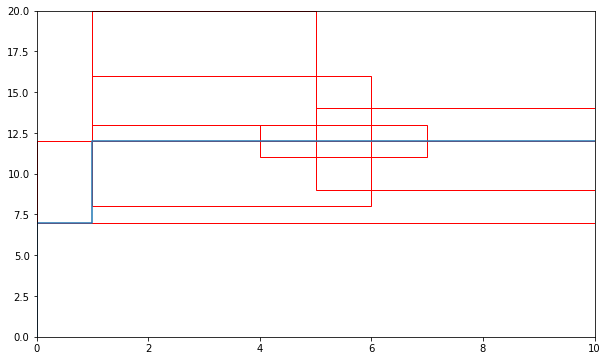

In [42]:
new_list = []
for i in range(R):
    a = requests_list[i]
    if i in Z:
        new_list.append(a)
print(new_list)


fig, ax = plt.subplots(figsize=(10, 6))
xlim(0,10)
ylim(0,20)

for i in range(len(new_list)):
    a = new_list[i]
    rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')
     
    ax.add_patch(rect)

# Add the stairs  
x = []
y = []
y.append(0)
ordre = sorted(new_list)
for i in range(len(ordre)):
    print(i)
    x.append(ordre[i][0])
    if i == 0:
        y.append(ordre[i][2])
    else:
        y.append(max(ordre[i][2], y[i]))
x.append(D)
print(x)
print(y)
plt.step(x, y)    

plt.show()